In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/combined_credit2.csv')

In [3]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train

,Age,Income,Loan_Amount,Loan_Term_Months,Rent_Payments,Utility_Payments_On_Time,Mobile_Phone_Payment_On_Time,Social_Media_Activity_Score,Transaction_Behavior_Score,gender_female,...,gender_non-binary,demographics_Rural,demographics_Sub_Urban,demographics_Urban,profession_Marketer Manager,profession_Software Engineer,profession_Student,social mediaplatform_Facebook,social mediaplatform_Instagram,social mediaplatform_YouTube
29,67,0.672378,0.131375,0.25,0.180040,True,True,0.173469,0.948980,False,...,True,False,True,False,False,True,False,False,False,True
535,65,0.134106,0.017020,0.25,0.993982,True,False,0.132653,0.367347,True,...,False,False,True,False,False,False,True,True,False,False
695,28,0.504811,0.936890,1.00,0.670010,True,True,0.479592,0.673469,True,...,False,False,False,True,False,True,False,False,True,False
557,50,0.410054,0.132848,0.00,0.942828,True,True,0.071429,0.632653,False,...,True,True,False,False,False,False,True,False,True,False
836,35,0.205239,0.994027,0.50,0.545637,True,False,0.285714,0.408163,False,...,True,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,61,0.439328,0.512509,0.25,0.634905,False,True,0.265306,0.418367,False,...,False,False,True,False,False,True,False,False,True,False
270,21,0.288757,0.330074,0.00,0.625878,True,True,0.234694,0.734694,False,...,True,False,False,True,False,False,True,True,False,False
860,22,0.780521,0.638954,0.50,0.678536,True,True,0.673469,0.469388,True,...,False,False,True,False,False,True,False,True,False,False
435,49,0.709565,0.339955,0.25,0.066199,True,True,0.928571,0.295918,False,...,True,False,True,False,True,False,False,False,False,True


In [6]:
print(X_train.shape)
print(y_train.shape)

(800, 21)
(800,)


In [7]:
import numpy as np

print(np.any(np.isnan(X_train)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isnan(y_train)))
print(np.any(np.isinf(y_train)))

False
False
False
False


LASSO REGRESSION

In [ ]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

In [ ]:
column_names = X.columns.to_list()

In [ ]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(column_names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 1)
plt.show()

In [ ]:
df_lasso=df[['Income','Loan_Term_Months','Mobile_Phone_Payment_On_Time','Transaction_Behavior_Score']]

In [ ]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(df_lasso, y, test_size=0.2, random_state=0)
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_lasso, y_train_lasso)

# Predict on the test set
y_pred = model.predict(X_test_lasso)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_lasso, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_lasso, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_lasso, y_pred)
print(f"Mean Absolute Error: {mae}")

RANDOM FOREST

In [ ]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

In [ ]:
column_names = X.columns.to_list()

In [ ]:
f_i = list(zip(column_names,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
df_rf=df[['Income','Loan_Amount','Rent_Payments','Transaction_Behavior_Score','Social_Media_Activity_Score','Age','Loan_Term_Months']]

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_rf, y, test_size=0.2, random_state=0)
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred = model.predict(X_test_rf)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_rf, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_rf, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_rf, y_pred)
print(f"Mean Absolute Error: {mae}")

Forward and Backward

Forward

In [ ]:
# Initialize the Ridge model
ridge = Ridge()

In [ ]:
# Perform Sequential Feature Selection
sfs_forward = SequentialFeatureSelector(
   ridge, n_features_to_select=3, direction="forward"
).fit(X, y)

In [ ]:
column_names = X.columns.to_list()

In [ ]:
arr = np.array(column_names)

In [ ]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=3, direction="forward"
).fit(X, y)

print(
    "Features selected by forward sequential selection: "
    f"{arr[sfs_forward.get_support()]}"
)

In [ ]:
df_sfs_forward=df[['Loan_Term_Months','social mediaplatform_Facebook','social mediaplatform_Instagram']]

In [ ]:
X_train_sfs_forward, X_test_sfs_forward, y_train_sfs_forward, y_test_sfs_forward = train_test_split(df_sfs_forward, y, test_size=0.2, random_state=0)
# Make predictions on the test set


# Initialize and train the model
model = LinearRegression()
model.fit(X_train_sfs_forward, y_train)
# Predict on the test set
y_pred = model.predict(X_test_sfs_forward)

In [ ]:
mse = mean_squared_error(y_test_sfs_forward, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_sfs_forward, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_sfs_forward, y_pred)
print(f"Mean Absolute Error: {mae}")

Backward

In [ ]:
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=3, direction="backward"
).fit(X, y)
print(
    "Features selected by backward sequential selection: "
    f"{arr[sfs_backward.get_support()]}"
)

In [ ]:
df_sfs_backward=df[['Loan_Term_Months','social mediaplatform_Facebook','social mediaplatform_YouTube']]

In [ ]:
X_train_sfs_backward, X_test_sfs_backward, y_train_sfs_backward, y_test_sfs_backward = train_test_split(df_sfs_backward, y, test_size=0.2, random_state=0)
# Make predictions on the test set


# Initialize and train the model
model = LinearRegression()
model.fit(X_train_sfs_backward, y_train)
# Predict on the test set
y_pred = model.predict(X_test_sfs_backward)

In [ ]:
mse = mean_squared_error(y_test_sfs_backward, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_sfs_backward, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_sfs_forward, y_pred)
print(f"Mean Absolute Error: {mae}")

Recursive Feature Eimination with Cross-Validation

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np


# Assume X is your feature matrix and y is the target variable

# Step 1: Initialize the linear regression model
model = LinearRegression()


# Step 2: Initialize RFE with the model and choose the number of features to select (e.g., 5)
rfe = RFE(model, n_features_to_select=20)

# Step 3: Fit RFE on the data
rfe.fit(X, y)

# Step 4: Get the selected features
X_rfe = rfe.transform(X)

# Step 5: Train the linear regression model on the selected features
model.fit(X_rfe, y)

# Step 6: Make predictions
y_pred = model.predict(X_rfe)

# Step 7: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Output the results
print("Selected Features:", rfe.support_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Selected Features: [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
Mean Squared Error (MSE): 0.0840003549870982
Root Mean Squared Error (RMSE): 0.2898281473340679
Mean Absolute Error (MAE): 0.25106471105134337


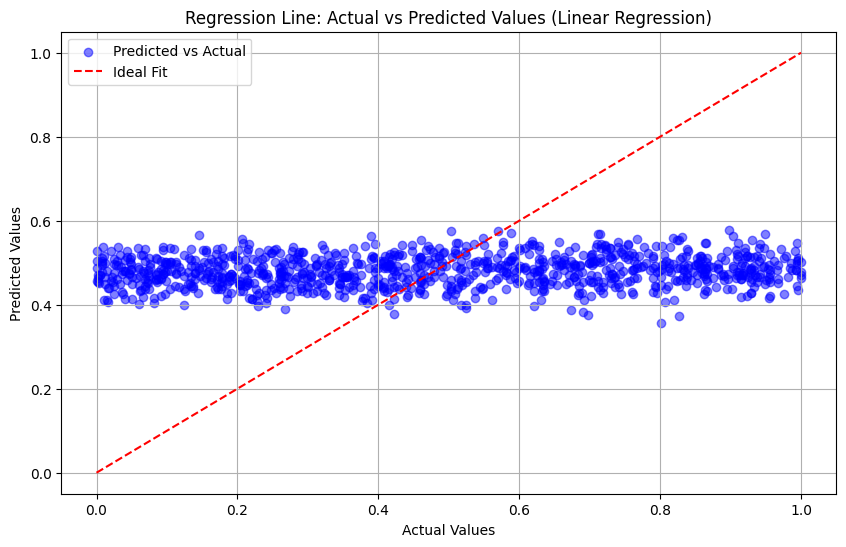

In [10]:
import matplotlib.pyplot as plt

# Plot regression line (Actual vs. Predicted values)
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")

# Ideal fit line (where predicted = actual)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ideal Fit")

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Line: Actual vs Predicted Values (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()


ANOVA

In [ ]:
column_names=X.columns.to_list()

In [ ]:
X_train_df=pd.DataFrame(X_train,columns=column_names)

In [ ]:
sel = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
selected_features=X_train_df.columns[sel.get_support()]
selected_features

In [ ]:
df_anova = df[selected_features]

In [ ]:
X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(df_anova, y, test_size=0.2, random_state=0)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_anova, y_train_anova)

# Predict on the test set
y_pred = model.predict(X_test_anova)


In [ ]:
mse = mean_squared_error(y_test_anova, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_anova, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_anova, y_pred)
print(f"Mean Absolute Error: {mae}")

Mutual Information

In [ ]:
# Calculate mutual information for each feature
mi = mutual_info_regression(X, y)

In [ ]:
# Create a DataFrame to display mutual information values for each feature
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

In [ ]:
# Sort by mutual information score
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

In [ ]:
# Print the mutual information scores
print(mi_df)

In [ ]:
# You can now select the most informative features based on the MI score
# For example, selecting the top 5 features based on MI
selected_features = mi_df['Feature'].head(5).values

In [ ]:
# Split the data into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)


In [ ]:
# Create a linear regression model
linear_model = LinearRegression()

# Train the model with the selected features
linear_model.fit(X_train, y_train)

# Make predictions on the test data using the selected features
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')